In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback

In [ ]:
wandb.init(project="cifar_10")

In [ ]:
cifar_10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar_10.load_data()

# Normalization
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

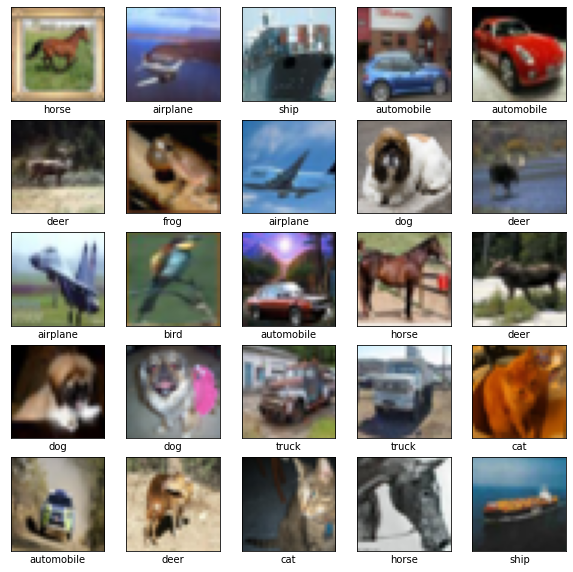

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
              "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  # The CIFAR labels happen to be arrays, 
  # which is why you need the extra index
  plt.xlabel(class_names[Y_train[i][0]])
plt.show()

## Model

In [ ]:
model = tf.keras.models.Sequential([
                                    layers.Flatten(input_shape=(32, 32, 3)),
                                    
                                    layers.Dense(32, activation="relu"),
                                    layers.Dense(64, activation="relu"),
                                    layers.Dense(10, activation="softmax")
                                    ])

In [ ]:
config = wandb.config
config.learning_rate = 0.0001

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, callbacks=[WandbCallback()])

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9951 - accuracy: 0.2824 - val_loss: 1.9051 - val_accuracy: 0.3202 - _timestamp: 1646596630.0000 - _runtime: 228.0000
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8373 - accuracy: 0.3503 - val_loss: 1.8112 - val_accuracy: 0.3599 - _timestamp: 1646596635.0000 - _runtime: 233.0000
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7773 - accuracy: 0.3727 - val_loss: 1.7803 - val_accuracy: 0.3697 - _timestamp: 1646596640.0000 - _runtime: 238.0000
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7387 - accuracy: 0.3871 - val_loss: 1.7352 - val_accuracy: 0.3885 - _timestamp: 1646596645.0000 - _runtime: 243.0000
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7087 - accuracy: 0.3986 - val_loss: 1.7351 - val_accuracy: 0.3863 - _timestamp: 1646596650.0000 - _runtime: 248.0000
Epoch 6/10
1250/1250 [===

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6258 - accuracy: 0.4273


[1.6257882118225098, 0.42730000615119934]